http://cocodataset.org/#format-results

In [1]:
%matplotlib inline
import os
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# please set directory
dataDir='C:/Users/user/kabir/ML/DR/biodesign'

In [3]:
dataType='dr_mscoco_exudate'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
exudate

COCO supercategories: 
exudate


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['exudate']);
imgIds = coco.getImgIds(catIds=catIds );

In [7]:
catIds

[1]

In [8]:
len(imgIds)

42

In [65]:
filename = '391_right_r_1_c_5.jpeg'
for img in coco.dataset['images']:
    if img['file_name'] == filename:
        break
#img = coco.loadImgs(imgIds[4])[0]
#filename = img['file_name']
path = '{}/{}/{}/{}'.format(dataDir, 'images_separated', 'exudate',filename)
path

'C:/Users/user/kabir/ML/DR/biodesign/images_separated/exudate/391_right_r_1_c_5.jpeg'

In [66]:
img

{'license': 1,
 'file_name': '391_right_r_1_c_5.jpeg',
 'coco_url': '',
 'height': 512,
 'width': 512,
 'date_captured': '',
 'flickr_url': '',
 'id': 33}

In [67]:
# Load an color image
im = cv2.imread(path, cv2.IMREAD_UNCHANGED)
im.shape

(511, 511, 3)

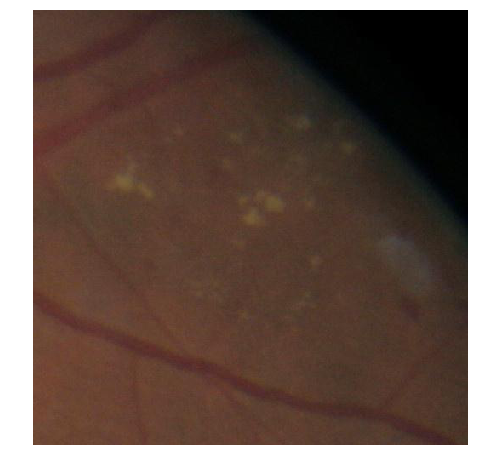

In [68]:
IMAGE_SIZE = (12, 8)
plt.figure(figsize=IMAGE_SIZE)
plt.axis('off')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

In [69]:
# load and display instance annotations
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [70]:
for ids in anns:
    bbox = ids['bbox']
    print(bbox)
    x = int(bbox[0])
    y = int(bbox[1])
    w = int(bbox[2])
    h = int(bbox[3])
    cv2.rectangle(img = im, 
              pt1 = (x,y), 
              pt2 = (x+w,y+h), 
              color = (0,255,0), 
              thickness = 2, 
              lineType = cv2.LINE_8, 
              shift = 0);

[87.0, 116.0, 303.0, 254.0]


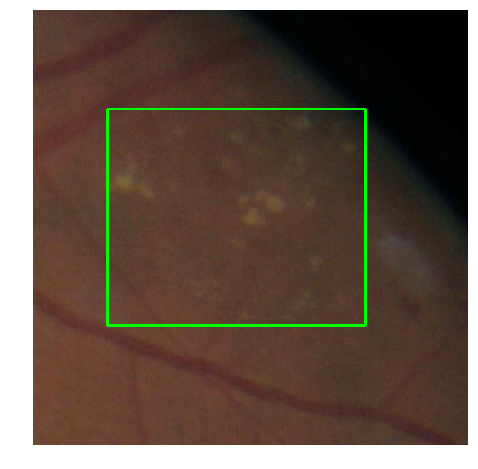

In [71]:
IMAGE_SIZE = (12, 8)
plt.figure(figsize=IMAGE_SIZE)
plt.axis('off')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
annIds

[64]

In [73]:
anns

[{'segmentation': [],
  'iscrowd': 0,
  'image_id': 33,
  'category_id': 1,
  'id': 64,
  'area': 76962.0,
  'bbox': [87.0, 116.0, 303.0, 254.0]}]